# Beautiful Soup Notebook

### Pre-Requisite Installation

1. Python and Jupyter Notebook installed and running
2. Python Packages requests and beautifulsoup installed
- `pip install package_name`

### Basic Terminology:
- XPATH - XPath uses path expressions to select nodes or node-sets in an XML document. This can vary for different browsers. Reference: https://www.w3schools.com/xml/xpath_intro.asp
- CSS Selectors - In CSS, selectors are patterns used to select the element(s) you want to style. This remains the same for webpage. Reference: https://www.w3schools.com/cssref/css_selectors.asp

### A few pointers:
- Try exploring a webpage manually first, look for patterns and try to make your code as generic as possible.
- The same webpage may behave different in different browsers.

### Ready Set Scrape
Lets begin by scraping the data from the below Webpage at the following URL:


http://www.journals4free.com/?q=data+science&x=7&y=9


In [5]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [6]:
website_link='http://www.journals4free.com/?q=data+science&x=7&y=9'

page = requests.get(website_link)


print(type(page))

page.text

<class 'requests.models.Response'>


u'\n\n\n\n\n\n\n\n\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN"\n   "http://www.w3.org/TR/html4/strict.dtd">\n<html>\n  \n\n\n\n\n<head>\n    <title>Journals for Free</title>\n    <meta name="description" content="Journals for Free (J4F) provides a large database of links to free scientific journals available on the web. Journals can be searched using free text and filtered by category, language and presence on other databases." />\n    <meta http-equiv="X-UA-Compatible" content="IE=7; IE=8" />\n    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n    <meta name="viewport" content="width=780">\n    <link rel="stylesheet" href="css/style.css" type="text/css">\n\n    <!-- google analytics stuff -->\n    <script type="text/javascript">\n        var _gaq = _gaq || [];\n        _gaq.push([\'_setAccount\', \'UA-27223627-1\']);\n        _gaq.push([\'_trackPageview\']);\n        (function() {\n            var ga = document.createElement(\'script\'); ga.type = \'text

### HTML is just this really:

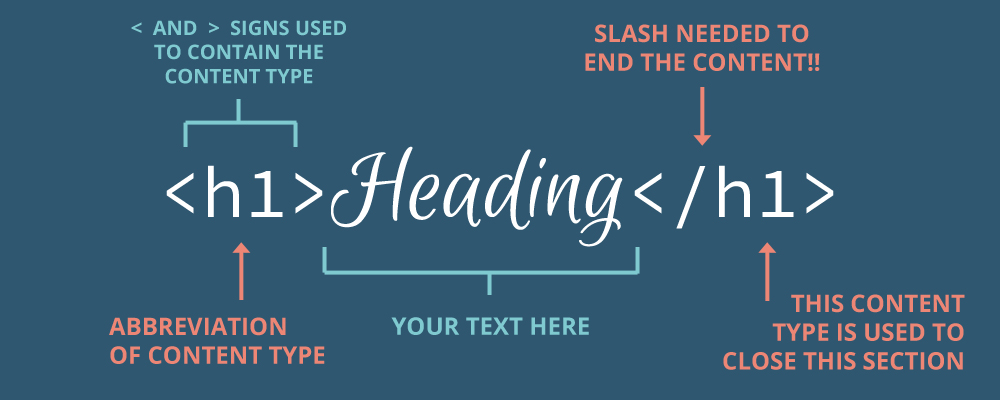

Source (and good html reference): http://www.thesepapersites.com/2016/09/13/html-tags-explained-simply/


In [7]:
# Create a BeautifulSoup object to read between the tags
soup = BeautifulSoup(page.text, 'html.parser')
soup

\n<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN"\n   "http://www.w3.org/TR/html4/strict.dtd">\n\n<html>\n<head>\n<title>Journals for Free</title>\n<meta content="Journals for Free (J4F) provides a large database of links to free scientific journals available on the web. Journals can be searched using free text and filtered by category, language and presence on other databases." name="description"/>\n<meta content="IE=7; IE=8" http-equiv="X-UA-Compatible"/>\n<meta content="text/html; charset=unicode-escape" http-equiv="Content-Type"/>\n<meta content="width=780" name="viewport"/>\n<link href="css/style.css" rel="stylesheet" type="text/css"/>\n<!-- google analytics stuff -->\n<script type="text/javascript">\n        var _gaq = _gaq || [];\n        _gaq.push(['_setAccount', 'UA-27223627-1']);\n        _gaq.push(['_trackPageview']);\n        (function() {\n            var ga = document.createElement('script'); ga.type = 'text/javascript'; ga.async = true;\n            ga.src = ('https:' 

## Pulling Text From a Web Page

In [8]:
# Pull all text from the required div class


document_list=soup.find(class_="grid7")
document_list

<div class="grid7">\n<ol class="results">\n<li class="result"><h3 class="resLink"><a href="http://www.journals4free.com/link.jsp?l=9087991">Earth System Science Data</a></h3><div class="resMetadata"><span class="resKey">Language:</span> English</div><div class="resMetadata"><span class="resKey">ISSN:</span> 1886-3508</div><div class="resMetadata"><span class="resKey">EISSN:</span> 1886-3516</div><div class="resMetadata"><span class="resKey">Availability:</span> 2009-present</div></li><li class="result"><h3 class="resLink"><a href="http://www.journals4free.com/link.jsp?l=12513052">Data Science Journal</a></h3><div class="resMetadata"><span class="resKey">Language:</span> English</div><div class="resMetadata"><span class="resKey">ISSN:</span> 1683-1470</div><div class="resMetadata"><span class="resKey">Scimago Journal Ranking (2013):</span> 0,189</div><div class="resMetadata"><span class="resKey">Hirsh Index:</span> 11</div><div class="resMetadata"><span class="resKey">Availability:</spa

In [9]:
# Get the required search result div class


document_titles=document_list.find_all(class_="result")
document_titles

[<li class="result"><h3 class="resLink"><a href="http://www.journals4free.com/link.jsp?l=9087991">Earth System Science Data</a></h3><div class="resMetadata"><span class="resKey">Language:</span> English</div><div class="resMetadata"><span class="resKey">ISSN:</span> 1886-3508</div><div class="resMetadata"><span class="resKey">EISSN:</span> 1886-3516</div><div class="resMetadata"><span class="resKey">Availability:</span> 2009-present</div></li>,
 <li class="result"><h3 class="resLink"><a href="http://www.journals4free.com/link.jsp?l=12513052">Data Science Journal</a></h3><div class="resMetadata"><span class="resKey">Language:</span> English</div><div class="resMetadata"><span class="resKey">ISSN:</span> 1683-1470</div><div class="resMetadata"><span class="resKey">Scimago Journal Ranking (2013):</span> 0,189</div><div class="resMetadata"><span class="resKey">Hirsh Index:</span> 11</div><div class="resMetadata"><span class="resKey">Availability:</span> 2002-present</div></li>,
 <li class=

Removing Superfluous Data

In [10]:

for row in document_titles:
    print(row.prettify())

<li class="result">
 <h3 class="resLink">
  <a href="http://www.journals4free.com/link.jsp?l=9087991">
   Earth System Science Data
  </a>
 </h3>
 <div class="resMetadata">
  <span class="resKey">
   Language:
  </span>
  English
 </div>
 <div class="resMetadata">
  <span class="resKey">
   ISSN:
  </span>
  1886-3508
 </div>
 <div class="resMetadata">
  <span class="resKey">
   EISSN:
  </span>
  1886-3516
 </div>
 <div class="resMetadata">
  <span class="resKey">
   Availability:
  </span>
  2009-present
 </div>
</li>

<li class="result">
 <h3 class="resLink">
  <a href="http://www.journals4free.com/link.jsp?l=12513052">
   Data Science Journal
  </a>
 </h3>
 <div class="resMetadata">
  <span class="resKey">
   Language:
  </span>
  English
 </div>
 <div class="resMetadata">
  <span class="resKey">
   ISSN:
  </span>
  1683-1470
 </div>
 <div class="resMetadata">
  <span class="resKey">
   Scimago Journal Ranking (2013):
  </span>
  0,189
 </div>
 <div class="resMetadata">
  <span cl

### Challenge

Extract the Journal information from the webpage

HINT: Look out for the class name for the corresponding data using inspect element

Inspect Element- each row listing in the result

In [11]:
links = document_titles[1].find(class_="resLink")
res = document_titles[1].find_all(class_="resMetadata")

In [12]:
####Insert Your Code here
